In [4]:
import pandas as pd
import psycopg2

def clean_price(price):
    return float(price.replace(' ', '').replace('Т', '').strip())

file1 = 'kingfisher_data.csv'
file2 = 'kingfisher_data2.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df['Цена продукта'] = merged_df['Цена продукта'].apply(clean_price)

connection = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="123321",
    host="localhost",
    port="5432"
)

cursor = connection.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS your_table_name (
    product_name VARCHAR(255),
    product_category VARCHAR(255),
    product_price NUMERIC(10, 2),
    city VARCHAR(255)
);
"""
cursor.execute(create_table_query)
connection.commit()

for _, row in merged_df.iterrows():
    insert_query = """
    INSERT INTO your_table_name (product_name, product_category, product_price, city)
    VALUES (%s, %s, %s, %s);
    """
    cursor.execute(insert_query, (row['Название продукта'], row['Категория продукта'], row['Цена продукта'], row['Город']))
    
connection.commit()

cursor.close()
connection.close()


C:\Users\a2n19\AppData\Local\Temp\ipykernel_11260\1233847296.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


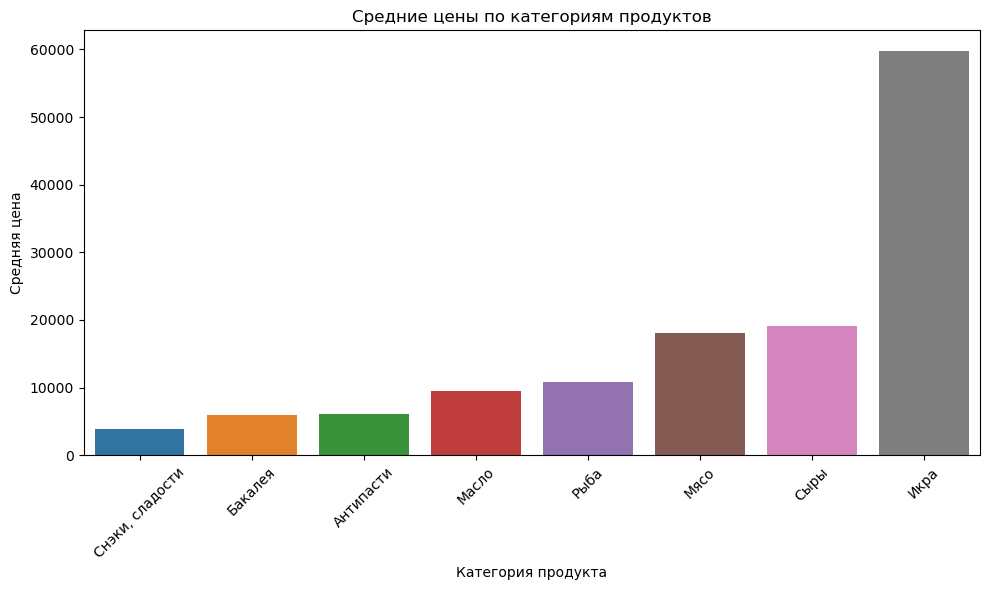

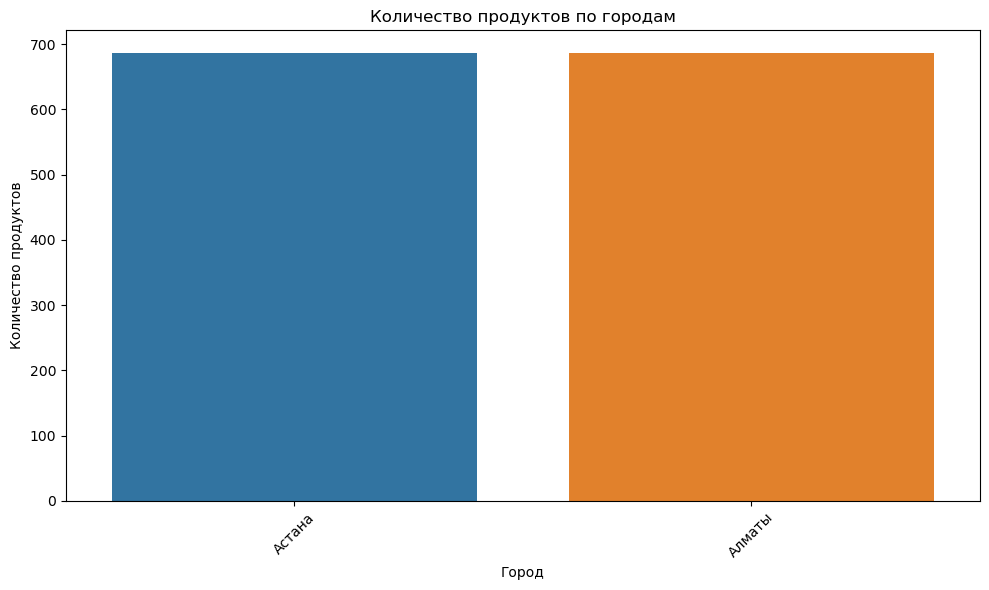

In [6]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

connection = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="123321",
    host="localhost",
    port="5432"
)

query = "SELECT * FROM your_table_name"
data = pd.read_sql_query(query, connection)

# Анализ данных
data['product_price'] = pd.to_numeric(data['product_price'], errors='coerce')
category_price = data.groupby('product_category')['product_price'].mean().sort_values()

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=category_price.index, y=category_price.values)
plt.title('Средние цены по категориям продуктов')
plt.ylabel('Средняя цена')
plt.xlabel('Категория продукта')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('category_price_analysis.png')
plt.show()

city_distribution = data['city'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values)
plt.title('Количество продуктов по городам')
plt.ylabel('Количество продуктов')
plt.xlabel('Город')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('city_distribution_analysis.png')
plt.show()

# Доля продуктов по категориям (круговая диаграмма)

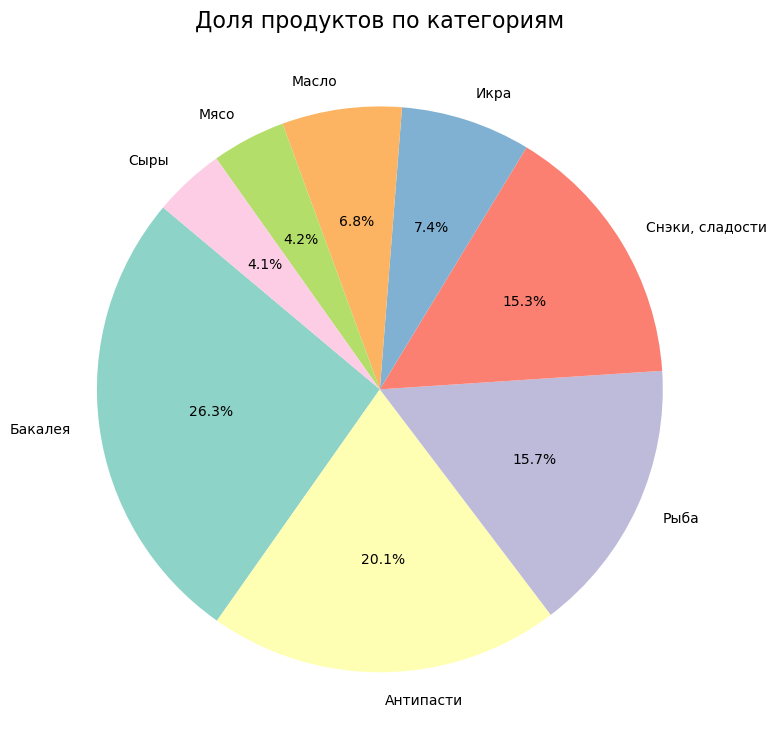

In [16]:
category_count = data['product_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Доля продуктов по категориям', fontsize=16)
plt.tight_layout()
plt.savefig('category_distribution_pie_chart.png')
plt.show()


# Топ-10 самых дорогих продуктов в каждом городе

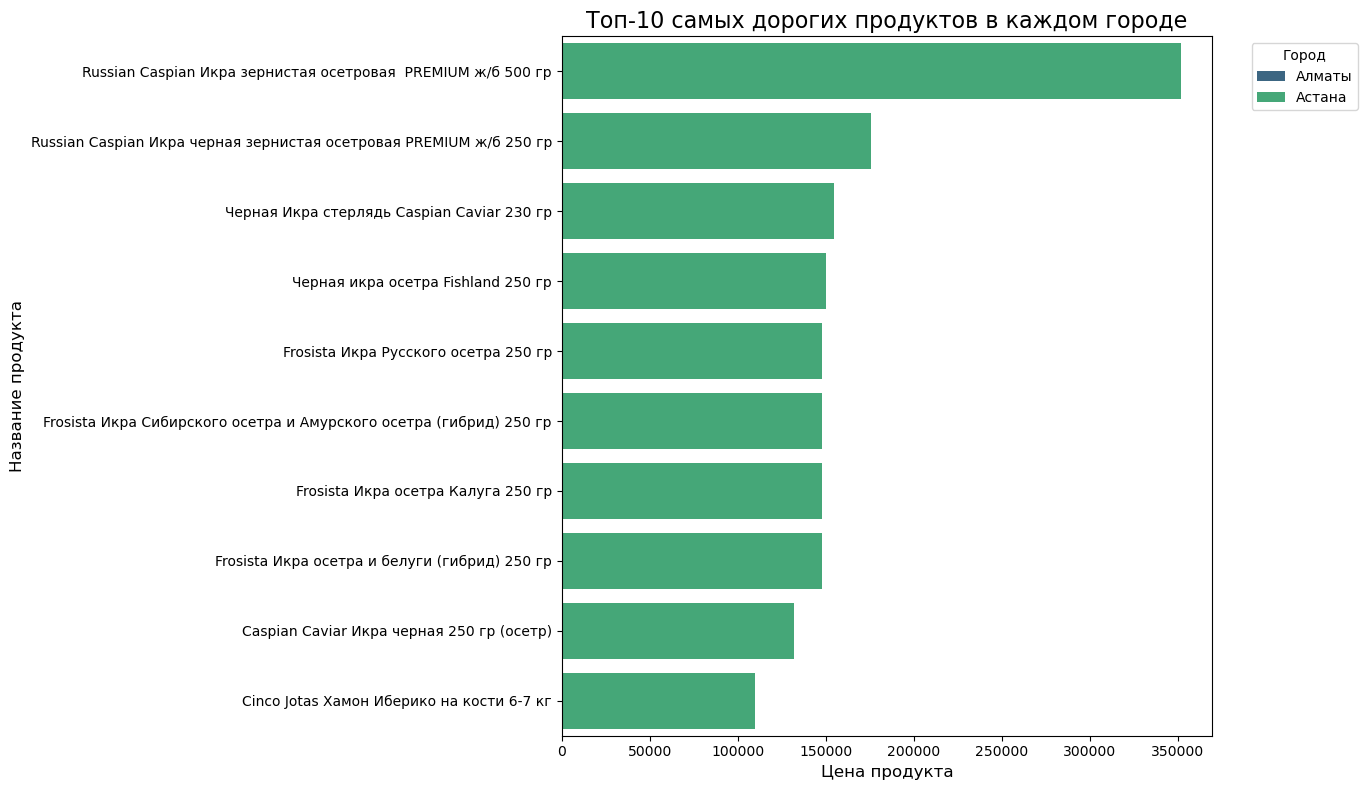

In [14]:
top_products_per_city = data.sort_values('product_price', ascending=False).groupby('city').head(10)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_products_per_city, 
    x='product_price', 
    y='product_name', 
    hue='city', 
    dodge=False, 
    palette="viridis"
)
plt.title('Топ-10 самых дорогих продуктов в каждом городе', fontsize=16)
plt.xlabel('Цена продукта', fontsize=12)
plt.ylabel('Название продукта', fontsize=12)
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_10_expensive_products_per_city.png')
plt.show()
